In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Property_Price_Train.csv')

In [3]:
data.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Percetage of null
pd.DataFrame(data.isnull().sum()[data.isnull().sum()*100/data.shape[0]>40]).index

Index(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],
      dtype='object')

In [5]:
# lets removed those columns have high % of nulls...and taken ID column as well which is not significant
data =data.drop(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature','Id'],axis=1)

In [6]:
data.shape

(1459, 75)

In [7]:
data.isnull().sum()[data.isnull().sum()>0]

Lot_Extent            259
Brick_Veneer_Type       8
Brick_Veneer_Area       8
Basement_Height        37
Basement_Condition     37
Exposure_Level         38
BsmtFinType1           37
BsmtFinType2           38
Electrical_System       1
Garage                 81
Garage_Built_Year      81
Garage_Finish_Year     81
Garage_Quality         81
Garage_Condition       81
dtype: int64

In [8]:
data.Lot_Extent.fillna(data.Lot_Extent.mean(), inplace = True)
data.Brick_Veneer_Type.fillna("None", inplace = True)
data.Brick_Veneer_Area.fillna(data.Brick_Veneer_Area.mean(), inplace = True)
data.Basement_Height.fillna("TA", inplace = True)
data.Basement_Condition.fillna("TA", inplace = True)
data.Exposure_Level.fillna("No", inplace = True)
data.BsmtFinType1.fillna('Unf', inplace = True)
data.BsmtFinType2.fillna("Unf", inplace = True)
data.Garage.fillna("Attchd", inplace = True)
data.Garage.fillna("Attchd", inplace = True)
data.Garage_Built_Year.fillna(data.Garage_Built_Year.mean(), inplace = True)
data.Garage_Finish_Year.fillna("RFn", inplace = True)
data.Garage_Quality.fillna("TA", inplace = True)
data.Garage_Condition.fillna("TA", inplace = True)

In [9]:
data.isnull().sum()[data.isnull().sum()>0]

Electrical_System    1
dtype: int64

In [10]:
data = data.dropna()

### Label Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data[data.select_dtypes('object').columns]=data[data.select_dtypes('object').columns].apply(le.fit_transform)

In [13]:
data.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,21.788818,0,0,0,0,12,2008,8,4,250000


In [14]:
data.select_dtypes(include='object').columns

Index([], dtype='object')

### Corr of Xn variable with y

### sorting significant variable only

In [15]:
#As of now we build the model using all x variable(74)

# lets build the model using ONLY sifnificant variable--> 
# correlation btwn x variables and y variable

In [16]:
y = data.Sale_Price
x = data.drop(['Sale_Price'],axis = 1)

In [17]:
corr_list = []
for col in x.columns:
    corr_list.append(y.corr(x[col]))
    

In [18]:
feat_imp = pd.DataFrame()

In [19]:
feat_imp['Features'] = x.columns
feat_imp['Imp'] = corr_list

In [20]:
significant_list = list(feat_imp[(feat_imp.Imp < - 0.2) | (feat_imp.Imp > 0.2)].Features)


In [21]:
significant_list.append('Sale_Price')

In [22]:
data1 = data.loc[ : ,significant_list]

In [23]:
#data1['Sale_Price'] = y.values

In [24]:
data = data1

### Remove Outliers

In [25]:
def remove_outliers(df,col,k):   # k is num of sd
    mean = df[col].mean()
    global df1              # data frame after removing outliers
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k*sd)]
    final_list = [x for x in final_list if (x < mean +k*sd)]
    df1 = df.loc[df[col].isin(final_list)]
    print(df1.shape)
    print("Number of outliers removed==>",df.shape[0]- df1.shape[0])
    

In [26]:
remove_outliers(data,'Sale_Price',2)

(1395, 35)
Number of outliers removed==> 63


In [27]:
data = df1

### Sampling

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#data = df1

In [30]:
train_data,test_data = train_test_split(data,test_size=.2)

In [31]:
data.shape           # original Data size

(1395, 35)

In [32]:
train_data.shape     # Train data size 80%

(1116, 35)

In [33]:
test_data.shape      # Test Data size

(279, 35)

In [34]:
train_data_x = train_data.iloc[ : , :-1]
train_data_y = train_data.iloc[ : ,-1]

In [35]:
test_data_x = test_data.iloc[ : , :-1]
test_data_y = test_data.iloc[ : ,-1]

### Model Building

#### Liner Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(train_data_x,train_data_y)

LinearRegression()

#### Rsquare

In [38]:
Rsquare = lr.score(train_data_x,train_data_y)
Rsquare

0.8547642103738042

#### Adjusted Rsquare

In [39]:
N = train_data_x.shape[0]
K =  train_data_x.shape[1]

AdjRsqure = 1-((1-Rsquare)*(N-1)/(N-K-1))
AdjRsqure

0.8501962021894466

In [40]:
Rsquare = 0.8749150931779194

AdjRsqure = 0.8658242857823863


In [41]:
#Prediction, Error, Check the Assumption. MSE, RMSE

#### Prediction

In [42]:
pred_train = lr.predict(train_data_x)    # prediction for each row...x vlaues(Featres)
pred_test = lr.predict(test_data_x)

err_train = train_data_y - pred_train
err_test =  test_data_y - pred_test

### Assumptions

In [43]:
np.mean(err_train  )

1.4291128217105798e-10

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   1.,   5.,   6.,  24.,  52., 106., 183., 247., 224., 126.,
         76.,  34.,  18.,   4.,   4.,   2.,   1.]),
 array([-300720.23972913, -290930.62275599, -281141.00578285,
        -271351.38880971, -261561.77183657, -251772.15486343,
        -241982.53789029, -232192.92091715, -222403.30394401,
        -212613.68697087, -202824.06999773, -193034.45302459,
        -183244.83605145, -173455.21907831, -163665.60210517,
        -153875.98513203, -144086.36815889, -134296.75118575,
        -124507.13421261, -114717.51723947, -104927.90026633,
         -95138.28329319,  -85348.66632005,  -75559.04934691,
         -65769.43237377,  -55979.81540063,  -46190.19842749,
         -36400.58145435,  -26610.96448121,  -16821.34750807,
          -7031.73053493,    2757.88643821,   12547.50341135,
          22337.12038448,   32126.73735762, 

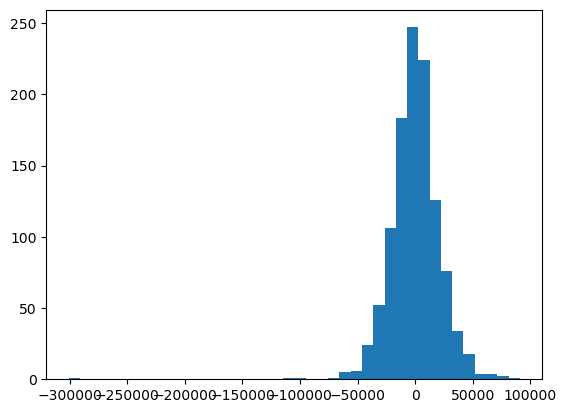

In [44]:
plt.hist(err_train, bins = 40)  # its not normally distributed

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sale_Price'>

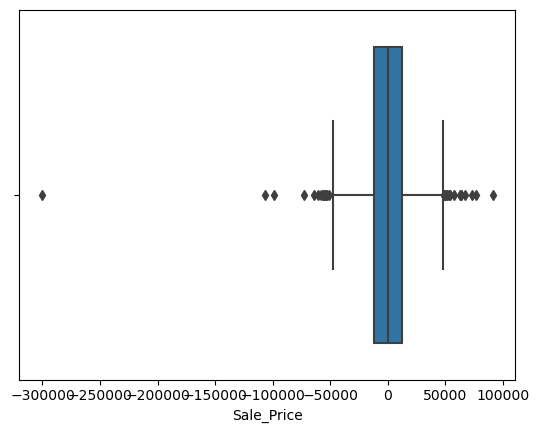

In [45]:
sns.boxplot(err_train)

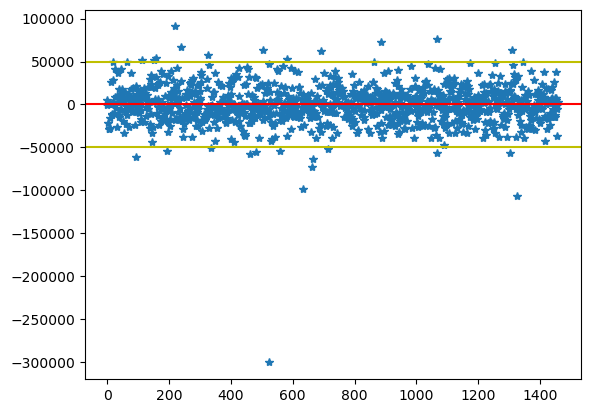

In [46]:
plt.plot(err_train,"*")
plt.axhline(y = np.mean(err_train),color = 'r')
#if u want horizontal line to x axis give y only
plt.axhline(y = 50000,color = 'y')
plt.axhline(y = -50000,color = 'y')

In [47]:
actual_pred = pd.DataFrame()

In [48]:
actual_pred['Actual'] = train_data_y
actual_pred['Predicted'] = pred_train

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

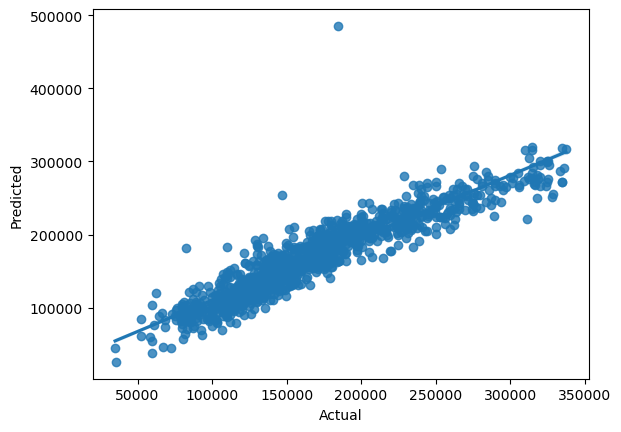

In [49]:
sns.regplot(x = 'Actual',y = 'Predicted',data = actual_pred)

In [50]:
err_train.skew()

-2.1859233379335175

In [51]:
err_train.kurtosis()

30.183026584382002

_____________________________________________________

### to check the mape,mse,rmse on the test data

In [52]:
mse = np.mean(np.square(err_test))  # mean---Squre---Error
rmse = np.sqrt(mse)
mape =  np.mean(np.abs((err_test *100/test_data_y)))

In [53]:
mse

1353211374.8953521

In [54]:
rmse

36786.02146054058

In [55]:
mape

11.914023981997182

In [56]:
acc = 100 - mape
acc

88.08597601800281

### MSE, MAPE By using sklearn

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [58]:
mean_squared_error(test_data_y,pred_test)

1353211374.895352

In [59]:
mean_absolute_percentage_error(test_data_y,pred_test)*100

11.914023981997186